## This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over 50k dollars a year.

### IMPORTING NECESSARY LIBRARIES.

In [87]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy.stats import zscore
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.preprocessing import QuantileTransformer
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,roc_auc_score,classification_report,confusion_matrix,roc_curve,auc,plot_roc_curve
plt.style.use('ggplot')


from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.linear_model import Lasso
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore")

### LOADING DATASET

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv")
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


### EDA

In [3]:
df.shape

(32560, 15)

In [4]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
df.isin(['NAN','NA','N/A','-',' ',np.nan]).sum().any()

False

In [7]:
# Value counts for every feature to check the missing again or unique values
for i in df.columns:
    print(df[i].value_counts())
    print('**********************************')


36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64
**********************************
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
**********************************
164190    13
203488    13
123011    13
148995    12
126675    12
          ..
325573     1
140176     1
318264     1
329205     1
257302     1
Name: Fnlwgt, Length: 21647, dtype: int64
**********************************
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate     

No null or empty values.

In [8]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

Data is either in integer or object format which needs to be changed.

In [9]:
df.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

In [10]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [11]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

### UNIVARIATE ANALISIS

In [12]:
df['Workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [13]:
df['Occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

In [14]:
df['Native_country'].value_counts()

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

Workplace, Occupation, Native_country have "?" symbol in their data which needs to be replaced.

In [15]:
df['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

No. of people who get salary more than 50k is much more than no. of people who get less than 50k.

In [16]:
#replacing ? with mode

df['Workclass'] = df.Workclass.str.replace('?', 'Private')
df['Occupation'] = df.Occupation.str.replace('?', 'Prof-specialty')
df['Native_country'] = df.Native_country.str.replace('?', 'United-States')

In [17]:
df['Occupation'].value_counts()

 Prof-specialty       5983
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

In [18]:
df['Workclass'].value_counts()

 Private             24532
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [19]:
df['Native_country'].value_counts()

 United-States                 29752
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 France                           29
 

The "?" symbol from the columns have been replaced.

In [20]:
#replacing preschool to 12th to "School"

df['Education'].replace([' 11th', ' 9th', ' 7th-8th', ' 5th-6th', ' 10th', ' 1st-4th', ' Preschool', ' 12th'],
                             ' School',inplace =True)
df['Education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 School           4253
 Masters          1723
 Assoc-voc        1382
 Assoc-acdm       1067
 Prof-school       576
 Doctorate         413
Name: Education, dtype: int64

In [21]:
df = df.drop(['Education_num', 'Capital_gain', 'Capital_loss'], axis=1)

In [22]:
df

,Age,Workclass,Fnlwgt,Education,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
1,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
2,53,Private,234721,School,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
3,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
4,37,Private,284582,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K
32556,40,Private,154374,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
32557,58,Private,151910,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K
32558,22,Private,201490,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K


In [23]:
#income

df['Income'] = df.Income.str.replace('<=50K', '0')
df['Income'] = df.Income.str.replace('>50K', '1')


In [24]:
df

,Age,Workclass,Fnlwgt,Education,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,0
1,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,0
2,53,Private,234721,School,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,0
3,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,0
4,37,Private,284582,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,0
32556,40,Private,154374,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,1
32557,58,Private,151910,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,0
32558,22,Private,201490,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,0


In [25]:
# split train data to continous and categorical varaiables.
num=df.select_dtypes(include=['float64','int64'])
cat=df.select_dtypes(include=['object'])

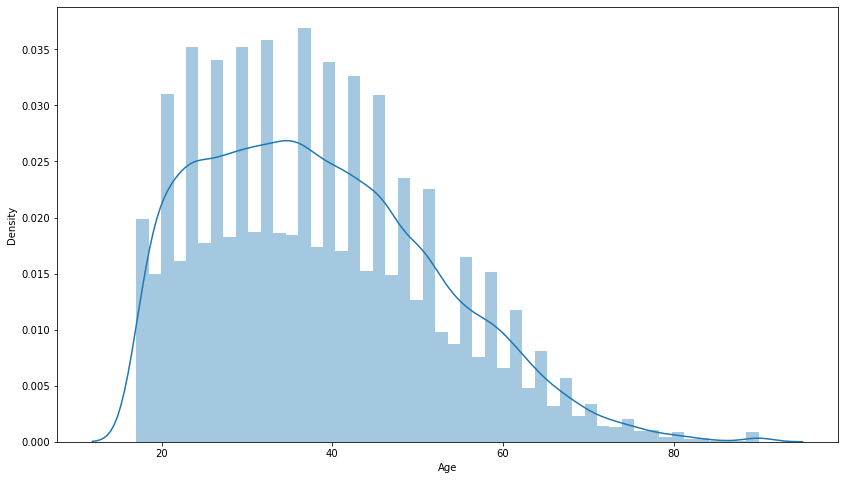

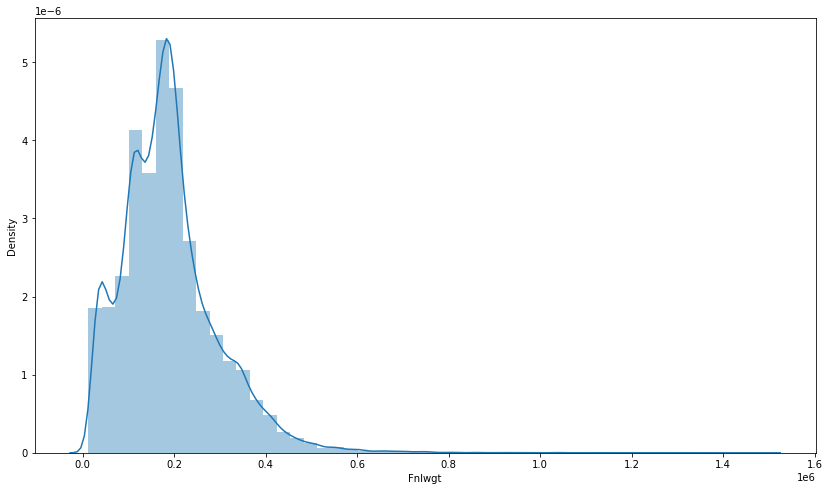

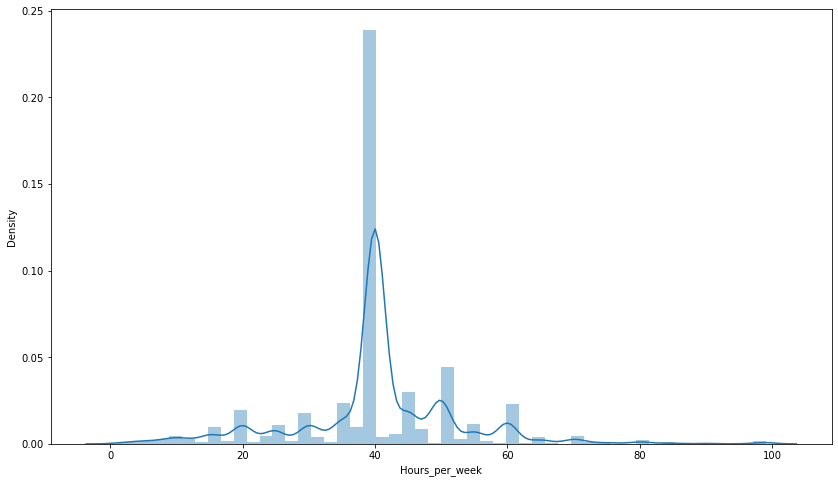

In [26]:
# Check Normality of continous data
for i in num.columns.difference(['Capital_loss','Capital_gain']):
    plt.figure(figsize=(14,8))
    sns.distplot(df[i])
    plt.show()

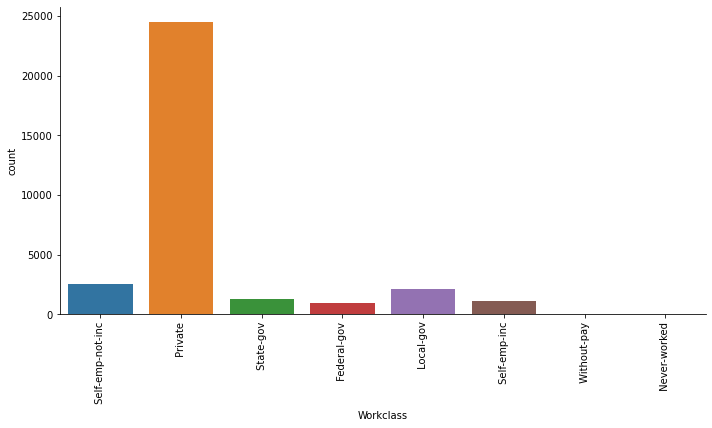

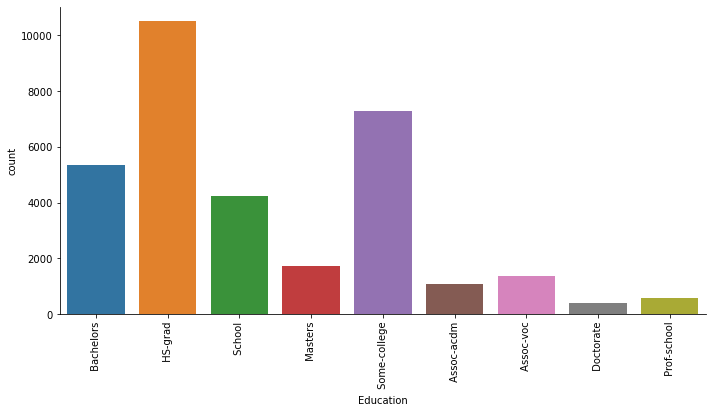

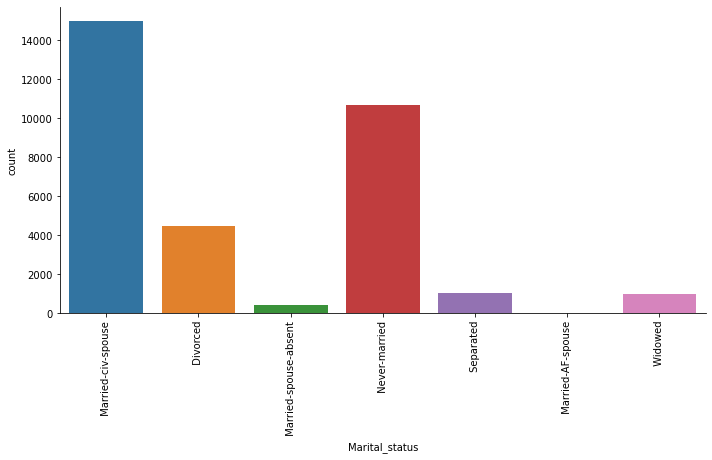

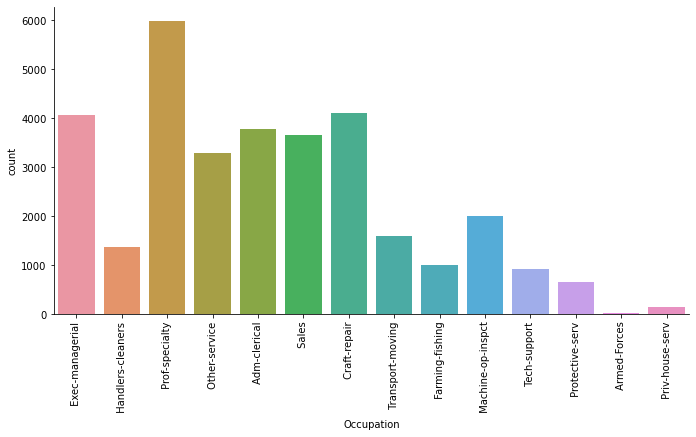

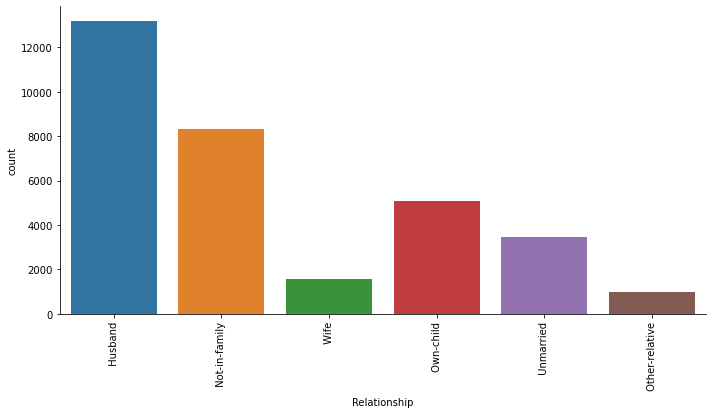

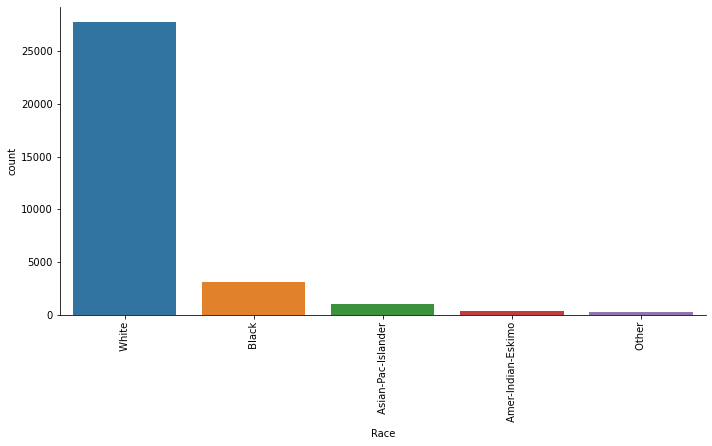

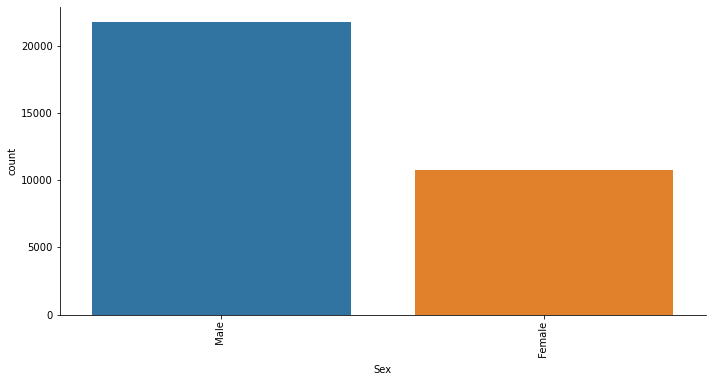

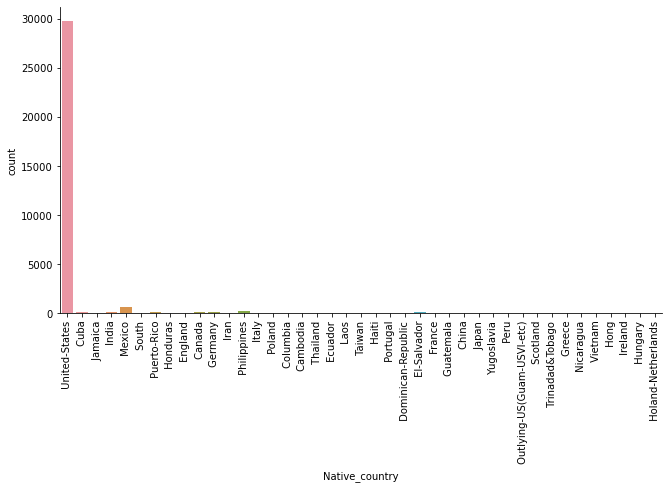

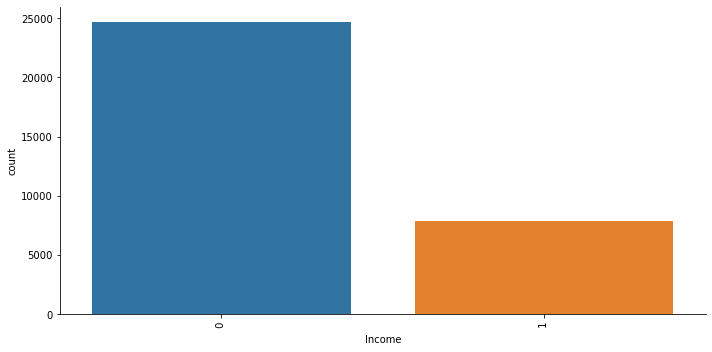

In [27]:
# Check count of categorical data
for i in cat.columns:
    sns.catplot(x=i, kind='count', data=df, height=5, aspect=2)
    plt.xticks(rotation=90)
    plt.show()


### BIVARIATE ANALYSIS

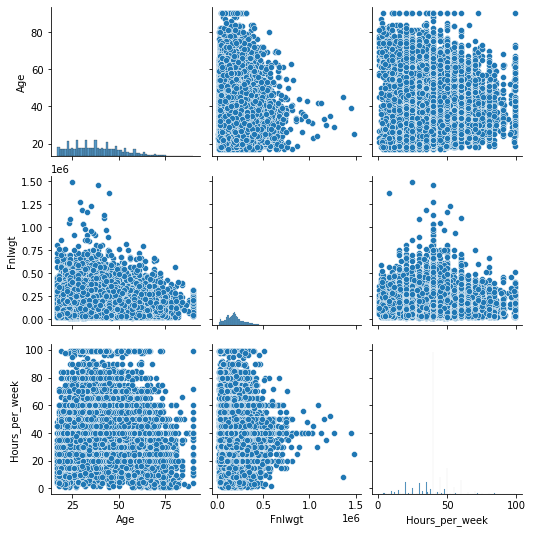

In [28]:
sns.pairplot(df)
plt.show()

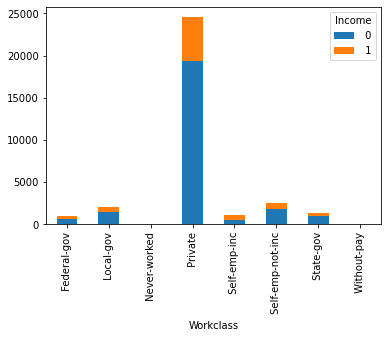

In [29]:
# Create a contingency table of Workclass and Income
cont_table = pd.crosstab(df['Workclass'], df['Income'])

# Plot a stacked bar chart
cont_table.plot(kind='bar', stacked=True)
plt.show()

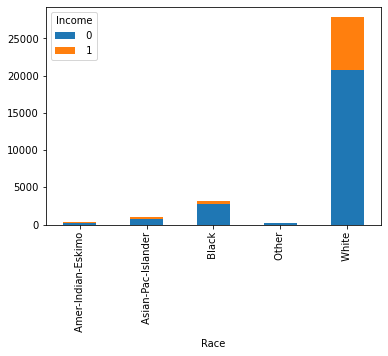

In [30]:
cont_table = pd.crosstab(df['Race'], df['Income'])

cont_table.plot(kind='bar', stacked=True)
plt.show()

No. of White people who get either more or less 50k salary is much more than any other race, which shows the no. of employees who are white are also large in number either male or female.

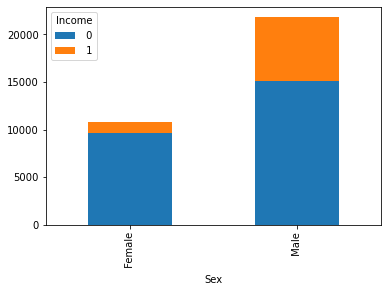

In [31]:
cont_table = pd.crosstab(df['Sex'], df['Income'])

cont_table.plot(kind='bar', stacked=True)
plt.show()

As we can see, in both scenarios female income is less than men when it is compared.

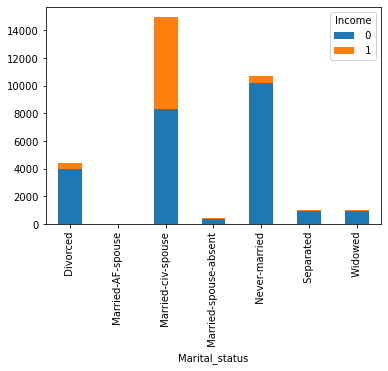

In [32]:
cont_table = pd.crosstab(df['Marital_status'], df['Income'])

cont_table.plot(kind='bar', stacked=True)
plt.show()

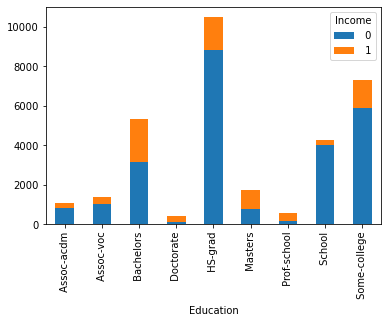

In [33]:
cont_table = pd.crosstab(df['Education'], df['Income'])

cont_table.plot(kind='bar', stacked=True)
plt.show()

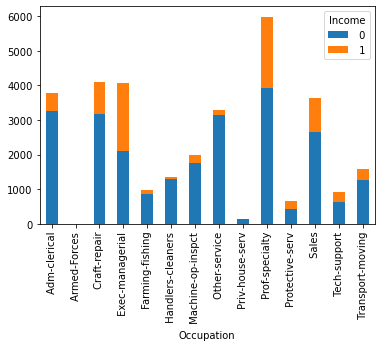

In [34]:
cont_table = pd.crosstab(df['Occupation'], df['Income'])

cont_table.plot(kind='bar', stacked=True)
plt.show()

### OUTLIERS TREATMENT

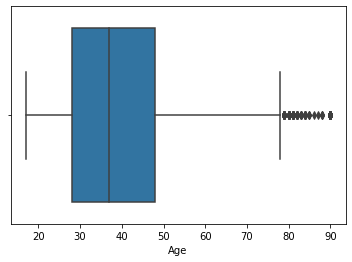

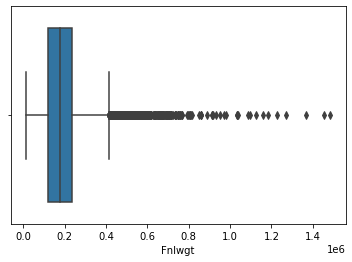

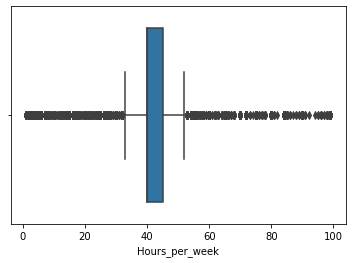

In [35]:
for col in num.columns.difference(['Capital_loss','Capital_gain']):
    sns.boxplot(df[col])
    plt.show()

In [36]:
# use Z-score method
from scipy.stats import zscore
outliers=num[["Age","Fnlwgt","Hours_per_week"]]
z=np.abs(zscore(outliers))
dfn=df[(z<3).all(axis=1)]
dfn

,Age,Workclass,Fnlwgt,Education,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,0
1,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,0
2,53,Private,234721,School,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,0
3,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,0
4,37,Private,284582,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,0
32556,40,Private,154374,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,1
32557,58,Private,151910,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,0
32558,22,Private,201490,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,0


In [37]:
# data loss
data_loss=((df.shape[0]-dfn.shape[0])/df.shape[0])*100
print(f'data loss is : {data_loss:0.1f}%')

data loss is : 2.7%


### Skewness

In [38]:
dfn.skew()

Age               0.470790
Fnlwgt            0.634065
Hours_per_week   -0.338625
Income            1.215051
dtype: float64

In [42]:
from sklearn.preprocessing import power_transform

dfn[['Age','Fnlwgt','Hours_per_week','Income']]=power_transform(dfn[['Age','Fnlwgt','Hours_per_week','Income']],method='yeo-johnson')
dfn.skew()

Age              -0.019867
Fnlwgt           -0.034511
Hours_per_week    0.107569
Income            1.215051
dtype: float64

In [67]:

df1= dfn.apply(LabelEncoder().fit_transform)
df1

,Age,Workclass,Fnlwgt,Education,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,33,5,2875,2,2,3,0,4,1,9,38,0
1,21,3,13888,4,0,5,1,4,1,36,38,0
2,36,3,15126,7,2,5,0,2,1,36,38,0
3,11,3,19089,2,2,9,5,2,0,36,4,0
4,20,3,17451,5,2,3,5,4,0,36,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...
32555,10,3,16300,0,2,12,5,4,0,34,38,0
32556,23,3,7951,4,2,6,0,4,1,36,38,1
32557,41,3,7758,4,6,0,4,4,0,36,38,0
32558,5,3,12699,4,4,0,3,4,1,16,38,0


In [68]:
from sklearn import preprocessing 
le = preprocessing.LabelEncoder()
df['Workclass']=le.fit_transform(df['Workclass'])
df['Occupation']=le.fit_transform(df['Occupation'])
df['Race']=le.fit_transform(df['Race'])
df['Native_country']=le.fit_transform(df['Native_country'])
df['Marital_status']=le.fit_transform(df['Marital_status'])
df['Sex']=le.fit_transform(df['Sex'])
df['Relationship']=le.fit_transform(df['Relationship'])
df['Income']= le.fit_transform(df['Income'])

In [69]:
ss= StandardScaler().fit(df1.drop('Income',axis=1))


In [76]:
X = df1.iloc[:, :-1]
y = df1.iloc[:, -1]
st=StandardScaler()
xf=st.fit_transform(X)
x=pd.DataFrame(data=xf, columns=X.columns)

In [77]:
X

,Age,Workclass,Fnlwgt,Education,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country
0,33,5,2875,2,2,3,0,4,1,9,38
1,21,3,13888,4,0,5,1,4,1,36,38
2,36,3,15126,7,2,5,0,2,1,36,38
3,11,3,19089,2,2,9,5,2,0,36,4
4,20,3,17451,5,2,3,5,4,0,36,38
...,...,...,...,...,...,...,...,...,...,...,...
32555,10,3,16300,0,2,12,5,4,0,34,38
32556,23,3,7951,4,2,6,0,4,1,36,38
32557,41,3,7758,4,6,0,4,4,0,36,38
32558,5,3,12699,4,4,0,3,4,1,16,38


In [78]:
y

0        0
1        0
2        0
3        0
4        0
        ..
32555    0
32556    1
32557    0
32558    0
32559    1
Name: Income, Length: 31668, dtype: int64

### RANDOM FORREST CLASSIFIER

In [80]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=i)
    rfc.fit(x_train,y_train)
   
    rfc_predict_test=rfc.predict(x_test)
    print(f'At random state {i}, The training accuracy is :-{accuracy_score(y_test,rfc_predict_test)}')
    
    print('\n')

At random state 0, The training accuracy is :-0.8203042771026696


At random state 1, The training accuracy is :-0.8235575543010238


At random state 2, The training accuracy is :-0.8268108314993781


At random state 3, The training accuracy is :-0.8268108314993781


At random state 4, The training accuracy is :-0.8291072624629222


At random state 5, The training accuracy is :-0.825758300641087


At random state 6, The training accuracy is :-0.8240359774184288


At random state 7, The training accuracy is :-0.8232705004305808


At random state 8, The training accuracy is :-0.8274806238637451


At random state 9, The training accuracy is :-0.8318821165438715


At random state 10, The training accuracy is :-0.827289254616783


At random state 11, The training accuracy is :-0.8166682614103914


At random state 12, The training accuracy is :-0.8332217012726055


At random state 13, The training accuracy is :-0.8275763084872261


At random state 14, The training accuracy is :-0.82901157783

At random state 78, The training accuracy is :-0.8320734857908334

In [81]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=78)
print (train_x.shape, train_y.shape)
print (test_x.shape, test_y.shape)

(22167, 11) (22167,)
(9501, 11) (9501,)


In [82]:
lg=LogisticRegression()
gnb=GaussianNB()
svc=SVC()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()

accuracy score for  LogisticRegression() is :  0.780338911693506 
 [[6870  425]
 [1662  544]] 
               precision    recall  f1-score   support

           0       0.81      0.94      0.87      7295
           1       0.56      0.25      0.34      2206

    accuracy                           0.78      9501
   macro avg       0.68      0.59      0.61      9501
weighted avg       0.75      0.78      0.75      9501
 

Cross Validation Score is : [0.76161479 0.76950834 0.76674938 0.7676517  0.76720054]
Mean Score : 0.7665449527119612


accuracy score for  GaussianNB() is :  0.765182612356594 
 [[5730 1565]
 [ 666 1540]] 
               precision    recall  f1-score   support

           0       0.90      0.79      0.84      7295
           1       0.50      0.70      0.58      2206

    accuracy                           0.77      9501
   macro avg       0.70      0.74      0.71      9501
weighted avg       0.80      0.77      0.78      9501
 

Cross Validation Score is : [0.74515111

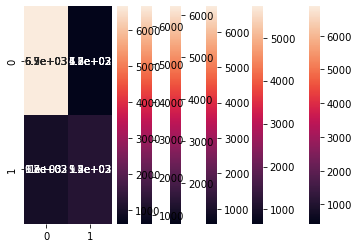

In [83]:
model=[lg,gnb,svc,dtc,knn,rfc]
for m in model:
    m.fit(train_x,train_y)
    m.score(train_x,train_y)
    predm=m.predict(test_x)
    print("accuracy score for ",m,"is : ",accuracy_score(test_y,predm),"\n",confusion_matrix(test_y,predm),"\n",classification_report(test_y,predm),"\n")
    sns.heatmap(confusion_matrix(test_y,predm),annot=True)
    score=cross_val_score(m,train_x,train_y,cv=5)
    print("Cross Validation Score is :",score)
    print("Mean Score :",score.mean())
    print("==============================================\n\n\n====================================================")

### LOGISTIC REGRESSION

In [88]:
lg.fit(x_train,y_train)
pred_train=lg.predict(x_train)
pred_test=lg.predict(x_test)
score_test=roc_auc_score(y_test,pred_test)
score_train=roc_auc_score(y_train,pred_train)
score_acc=accuracy_score(y_test,pred_test)
print('Roc_Auc train: ',score_train)
print('Roc_Auc test: ',score_test)
print('Auc test: ',score_acc)
print('Confusion Matrix: ' ,'\n',confusion_matrix(y_test,pred_test))
print('Classification Report: ','\n',classification_report(y_test,pred_test))

Roc_Auc train:  0.5869363418769118
Roc_Auc test:  0.5860143150127696
Auc test:  0.7735144962204574
Confusion Matrix:  
 [[7516  452]
 [1915  568]]
Classification Report:  
               precision    recall  f1-score   support

           0       0.80      0.94      0.86      7968
           1       0.56      0.23      0.32      2483

    accuracy                           0.77     10451
   macro avg       0.68      0.59      0.59     10451
weighted avg       0.74      0.77      0.74     10451



### DECISION TREE

In [89]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred_train=dtc.predict(x_train)
pred_test=dtc.predict(x_test)
score_train=roc_auc_score(y_train,pred_train)
score_test=roc_auc_score(y_test,pred_test)
print('Roc_Auc Score_train: ',score_train)
print('Roc_Auc Score_test: ',score_test)
print('Confusion Matrix: ' ,'\n','\n',confusion_matrix(y_test,pred_test))
print('Classification Report: ','\n',classification_report(y_test,pred_test))
print('CV  : ',cross_val_score(dtc,x,y,cv=9).mean())

Roc_Auc Score_train:  1.0
Roc_Auc Score_test:  0.684985992095648
Confusion Matrix:  
 
 [[6741 1227]
 [1182 1301]]
Classification Report:  
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      7968
           1       0.51      0.52      0.52      2483

    accuracy                           0.77     10451
   macro avg       0.68      0.68      0.68     10451
weighted avg       0.77      0.77      0.77     10451

CV  :  0.7750726364502695


### SVC

In [90]:
svc= SVC()
svc.fit(x_train,y_train)
pred_train=svc.predict(x_train)
pred_test=svc.predict(x_test)
score_test=roc_auc_score(y_test,pred_test)
score_train=roc_auc_score(y_train,pred_train)
print('Roc_Auc train: ',score_train)
print('Roc_Auc test: ',score_test)
print('Confusion Matrix: ' ,'\n',confusion_matrix(y_test,pred_test))
print('Classification Report: ','\n',classification_report(y_test,pred_test))
print('CV  : ',cross_val_score(svc,x,y,cv=9).mean())

Roc_Auc train:  0.6987917004892137
Roc_Auc test:  0.6773210441443582
Confusion Matrix:  
 [[7312  656]
 [1398 1085]]
Classification Report:  
               precision    recall  f1-score   support

           0       0.84      0.92      0.88      7968
           1       0.62      0.44      0.51      2483

    accuracy                           0.80     10451
   macro avg       0.73      0.68      0.70     10451
weighted avg       0.79      0.80      0.79     10451

CV  :  0.8056084417088863


### HYPER PARAMETER TUNING

In [91]:
dict2={"random_state":[50,100,200],"criterion":['gini', 'entropy',],"min_samples_split":[2,3]}
gv=GridSearchCV(rfc,dict2, refit=True)
gv.fit(train_x,train_y)
gv.best_params_

{'criterion': 'gini', 'min_samples_split': 3, 'random_state': 100}

In [92]:
rf1=RandomForestClassifier(criterion='gini', min_samples_split=3 , random_state= 50)
rf1.fit(train_x,train_y)
prf=rf1.predict(test_x)
print(accuracy_score(test_y,prf))
score=cross_val_score(m,train_x,train_y,cv=5)
print("Cross Validation Score is :",score)
print("Mean Score :",score.mean())

0.8360172613409115
Cross Validation Score is : [0.8308525  0.83265674 0.82111437 0.8278818  0.81457252]
Mean Score : 0.8254155872209912


### SAVING THE MODEL

In [93]:
import joblib
joblib.dump(rf1,"CENSUS_SALARY.obj")

['CENSUS_SALARY.obj']

In [97]:
dataset=joblib.load('CENSUS_SALARY.obj')

### PREDICTION

In [98]:
#Predict

prediction = dataset.predict(x_test)

prediction

array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

In [99]:
pd.DataFrame([dataset.predict(x_test)[:], y_test[:]], index = ['Predicted', 'Original'])

,0,1,2,3,4,5,6,7,8,9,...,10441,10442,10443,10444,10445,10446,10447,10448,10449,10450
Predicted,0,1,0,0,0,1,0,0,1,0,...,0,1,1,0,0,0,0,0,0,1
Original,0,1,0,0,0,1,0,0,1,0,...,0,1,1,0,0,0,0,0,0,1
